In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/rossmann-store-sales/sample_submission.csv
/kaggle/input/rossmann-store-sales/test.csv
/kaggle/input/rossmann-store-sales/store.csv
/kaggle/input/rossmann-store-sales/train.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/kaggle/input/rossmann-store-sales/train.csv')
store= pd.read_csv('/kaggle/input/rossmann-store-sales/store.csv')
test= pd.read_csv('/kaggle/input/rossmann-store-sales/test.csv')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print(data.shape)
print(store.shape)

(1017209, 9)
(1115, 10)


In [5]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


****Granularity - One big brand has various number of branches and each rows is the data of that branch day wise****

In [6]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


****Granularity - Here it is the metadata of the branches with respect to promotional events events conducted overall****

In [7]:
data.info()
# data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
data.describe(include='object')

,Date,StateHoliday
count,1017209,1017209
unique,942,5
top,2014-02-16,0
freq,1115,855087


In [9]:
data.describe()[['Sales','Customers']]

,Sales,Customers
count,1.017209e+06,1.017209e+06
mean,5.773819e+03,6.331459e+02
std,3.849926e+03,4.644117e+02
min,0.000000e+00,0.000000e+00
25%,3.727000e+03,4.050000e+02
50%,5.744000e+03,6.090000e+02
75%,7.856000e+03,8.370000e+02
max,4.155100e+04,7.388000e+03


In [10]:
data.describe()[['Sales','Customers']].loc['mean']

Sales        5773.818972
Customers     633.145946
Name: mean, dtype: float64

In [11]:
data.describe()[['Sales','Customers']].loc['min']

Sales        0.0
Customers    0.0
Name: min, dtype: float64

In [12]:
data.describe()[['Sales','Customers']].loc['max']

Sales        41551.0
Customers     7388.0
Name: max, dtype: float64

In [13]:
data.Store.nunique()

1115

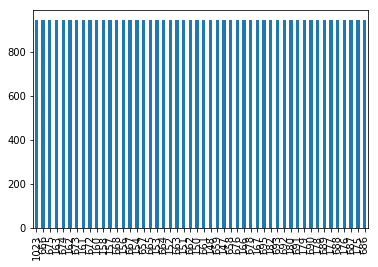

In [14]:
data.head()
data.Store.value_counts().head(50).plot.bar()

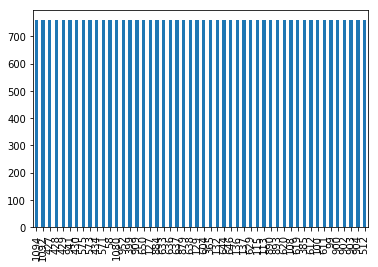

In [15]:
data.Store.value_counts().tail(50).plot.bar()

In [16]:
data.Store.value_counts()

1023    942
666     942
675     942
163     942
674     942
       ... 
900     758
902     758
903     758
904     758
512     758
Name: Store, Length: 1115, dtype: int64

****Store - It is categorical column hence min and max must not be done. we do value counts to check if every category has same amount of data********

In [17]:
data.DayOfWeek.value_counts()

5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64

In [18]:
data.Open.value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [19]:
data.Promo.value_counts()

0    629129
1    388080
Name: Promo, dtype: int64

In [20]:
data['Date']=pd.to_datetime(data['Date'],format='%Y-%m-%d')
store_id= data.Store.unique()[0]
print(store_id)
store_rows=data[data['Store']==store_id]
print(store_rows.shape)
# store_rows.resample('1D',on='Date')['Sales'].sum().plot.line(figsize=(14,4))

1
(942, 9)


In [21]:
# store_rows[store_rows['Sales']==0]

In [22]:
test['Date']=pd.to_datetime(test['Date'],format='%Y-%m-%d')
store_test_rows = test[test['Store']==store_id]
store_test_rows['Date'].min(),store_test_rows['Date'].max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

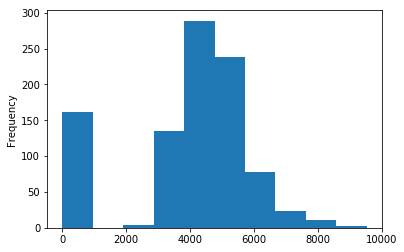

In [23]:
store_rows['Sales'].plot.hist()
# it is slightly skewed.

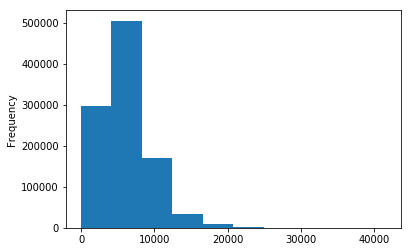

In [24]:
data['Sales'].plot.hist()
# it is slightly skewed.

In [25]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [26]:
# store.isna.sum()

In [27]:
store_id=store[store['Store']==1].T

In [28]:
store[~store['Promo2SinceYear'].isna()].iloc[0]

Store                                      2
StoreType                                  a
Assortment                                 a
CompetitionDistance                      570
CompetitionOpenSinceMonth                 11
CompetitionOpenSinceYear                2007
Promo2                                     1
Promo2SinceWeek                           13
Promo2SinceYear                         2010
PromoInterval                Jan,Apr,Jul,Oct
Name: 1, dtype: object

In [29]:
# Method1
store = pd.read_csv('/kaggle/input/rossmann-store-sales/store.csv')
store['Promo2SinceWeek']= store['Promo2SinceWeek'].fillna(0)
store['Promo2SinceYear']= store['Promo2SinceYear'].fillna(store['Promo2SinceYear'].mode().iloc[0])
store['PromoInterval']= store['PromoInterval'].fillna(store['PromoInterval'].mode().iloc[0]) 

store['CompetitionDistance']=store['CompetitionDistance'].fillna(store['CompetitionDistance'].max())
store['CompetitionOpenSinceMonth']= store['CompetitionOpenSinceMonth'].fillna(store['CompetitionOpenSinceMonth'].mode().iloc[0])
store['CompetitionOpenSinceYear']= store['CompetitionOpenSinceYear'].fillna(store['CompetitionOpenSinceYear'].mode().iloc[0])
store.isna().sum()
      

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [30]:
data_merged = data.merge(store, on='Store',how='left')
print(data.shape)
print(data_merged.shape)
print(data_merged.isna().sum().sum()) #to cross check if there are any missing values

(1017209, 9)
(1017209, 18)
0


In [31]:
# encoding
# 3 categorical column,1 date column, rest are numerical
# data_merged.dtypes
data_merged['day']=data_merged['Date'].dt.day
data_merged['month']=data_merged['Date'].dt.month
data_merged['year']=data_merged['Date'].dt.year
#data_merged['dayofweek']=data_merged['Date'].dt.strftime('%a')


In [32]:
# Decision tress - label encoding should be used.
# regression - one hot encoding must be used.

In [33]:
# data_merged.dtypes
# StateHoliday,StoreType,Assortment,PromoInterval
data_merged['StateHoliday'].unique()
# for creating dummy variables - label encoding is used
data_merged['StateHoliday']=data_merged['StateHoliday'].map({'0':0,0:0,'a':1,'b':2,'c':3})
data_merged['StateHoliday']=data_merged['StateHoliday'].astype(int)
data_merged

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,day,month,year
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,620.0,9.0,2009.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,29910.0,4.0,2015.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,1,a,...,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013
1017205,1112,2,2013-01-01,0,0,0,0,1,1,c,...,1880.0,4.0,2006.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct",1,1,2013
1017206,1113,2,2013-01-01,0,0,0,0,1,1,a,...,9260.0,9.0,2013.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct",1,1,2013
1017207,1114,2,2013-01-01,0,0,0,0,1,1,a,...,870.0,9.0,2013.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct",1,1,2013


In [34]:
# encoding assorted
data_merged['Assortment']
# for creating dummy variables - label encoding is used
data_merged['Assortment']=data_merged['Assortment'].map({'a':1,'b':2,'c':3})
data_merged['Assortment']=data_merged['Assortment'].astype(int)
data_merged

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,day,month,year
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,620.0,9.0,2009.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,29910.0,4.0,2015.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,1,a,...,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013
1017205,1112,2,2013-01-01,0,0,0,0,1,1,c,...,1880.0,4.0,2006.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct",1,1,2013
1017206,1113,2,2013-01-01,0,0,0,0,1,1,a,...,9260.0,9.0,2013.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct",1,1,2013
1017207,1114,2,2013-01-01,0,0,0,0,1,1,a,...,870.0,9.0,2013.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct",1,1,2013


In [35]:
data_merged['StoreType'].unique()
data_merged['StoreType']=data_merged['StoreType'].map({'a':1,'b':2,'c':3,'d':4})
data_merged['StoreType']=data_merged['StoreType'].astype(int)
data_merged

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,day,month,year
0,1,5,2015-07-31,5263,555,1,1,0,1,3,...,1270.0,9.0,2008.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,1,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,1,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,3,...,620.0,9.0,2009.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,1,...,29910.0,4.0,2015.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,1,1,...,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013
1017205,1112,2,2013-01-01,0,0,0,0,1,1,3,...,1880.0,4.0,2006.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct",1,1,2013
1017206,1113,2,2013-01-01,0,0,0,0,1,1,1,...,9260.0,9.0,2013.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct",1,1,2013
1017207,1114,2,2013-01-01,0,0,0,0,1,1,1,...,870.0,9.0,2013.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct",1,1,2013


In [36]:
data_merged['PromoInterval'].unique()
map_promo = {'Jan,Apr,Jul,Oct':1,'Feb,May,Aug,Nov':2,'Mar,Jun,Sept,Dec':3}
data_merged['PromoInterval']=data_merged['PromoInterval'].map(map_promo)
data_merged

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,day,month,year
0,1,5,2015-07-31,5263,555,1,1,0,1,3,...,1270.0,9.0,2008.0,0,0.0,2011.0,1,31,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,1,...,570.0,11.0,2007.0,1,13.0,2010.0,1,31,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,1,...,14130.0,12.0,2006.0,1,14.0,2011.0,1,31,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,3,...,620.0,9.0,2009.0,0,0.0,2011.0,1,31,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,1,...,29910.0,4.0,2015.0,0,0.0,2011.0,1,31,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,1,1,...,1900.0,6.0,2014.0,1,31.0,2013.0,1,1,1,2013
1017205,1112,2,2013-01-01,0,0,0,0,1,1,3,...,1880.0,4.0,2006.0,0,0.0,2011.0,1,1,1,2013
1017206,1113,2,2013-01-01,0,0,0,0,1,1,1,...,9260.0,9.0,2013.0,0,0.0,2011.0,1,1,1,2013
1017207,1114,2,2013-01-01,0,0,0,0,1,1,1,...,870.0,9.0,2013.0,0,0.0,2011.0,1,1,1,2013


In [37]:
# Train and validate Split
features= data_merged.columns.drop(['Sales','Date'])
from sklearn.model_selection import train_test_split
train_x,validate_x,train_y,validate_y = train_test_split(data_merged[features],np.log(data_merged['Sales']+1),test_size=0.2,random_state=1)
train_x.shape,validate_x.shape,train_y.shape,validate_y.shape

((813767, 19), (203442, 19), (813767,), (203442,))

In [38]:
# from sklearn.tree import DecisionTreeRegressor

# model_dt = DecisionTreeRegressor(max_depth=20,random_state=1).fit(train_x,train_y)
# validate_y_pred = model_dt.predict(validate_x)

from sklearn.tree import DecisionTreeRegressor
model_dt=DecisionTreeRegressor(max_depth=10,random_state=1).fit(train_x,train_y)
validate_y_pred=model_dt.predict(validate_x)

In [39]:
!pip install pydotplus

     |████████████████████████████████| 286kB 5.0MB/s 
  Created wheel for pydotplus: filename=pydotplus-2.0.2-cp36-none-any.whl size=24566 sha256=05aee6cb7c31b752602b07698e73bcf68016687fa7ae3969cca996a1b4d018ce
  Stored in directory: /tmp/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [40]:
def draw_tree(model, columns):
    import pydotplus
    from sklearn.externals.six import StringIO
    from IPython.display import Image
    import os
    from sklearn import tree
    
    graphviz_path = 'C:\Program Files (x86)\Graphviz2.38/bin/'
    os.environ["PATH"] += os.pathsep + graphviz_path

    dot_data = StringIO()
    tree.export_graphviz(model,
                         out_file=dot_data,
                         feature_names=columns)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

/opt/conda/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.410455 to fit



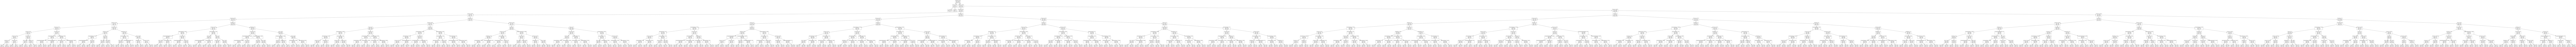

In [41]:
draw_tree(model_dt,features)

In [42]:
validate_y_pred = model_dt.predict(validate_x)
from sklearn.metrics import mean_squared_error
validate_y_inv = np.exp(validate_y) - 1
validate_y_pred_inv = np.exp(validate_y_pred) - 1
np.sqrt(mean_squared_error(validate_y_inv , validate_y_pred_inv))

1006.5490412542867

# steps done in the current ml data

* summary stats
* understand your data
* data preprocessing
 --missing value imputation
 --transformation
 --scaling
 --encoding
* model fitting'
* model summary
* Prediction
* Evaluation

In [43]:
# submitting the train on test data set

In [44]:
model_dt.feature_importances_

array([4.51763902e-05, 4.05703519e-05, 9.98092769e-01, 0.00000000e+00,
       5.12216022e-04, 0.00000000e+00, 0.00000000e+00, 7.45835222e-04,
       7.66171029e-05, 3.07044136e-04, 1.76818366e-05, 1.90128833e-05,
       1.37081406e-05, 9.23299222e-05, 3.50122943e-05, 1.03366174e-06,
       0.00000000e+00, 9.90715336e-07, 2.39501380e-09])

Store                        4.517639e-05
DayOfWeek                    4.057035e-05
Customers                    9.980928e-01
Open                         0.000000e+00
Promo                        5.122160e-04
StateHoliday                 0.000000e+00
SchoolHoliday                0.000000e+00
StoreType                    7.458352e-04
Assortment                   7.661710e-05
CompetitionDistance          3.070441e-04
CompetitionOpenSinceMonth    1.768184e-05
CompetitionOpenSinceYear     1.901288e-05
Promo2                       1.370814e-05
Promo2SinceWeek              9.232992e-05
Promo2SinceYear              3.501229e-05
PromoInterval                1.033662e-06
day                          0.000000e+00
month                        9.907153e-07
year                         2.395014e-09
dtype: float64

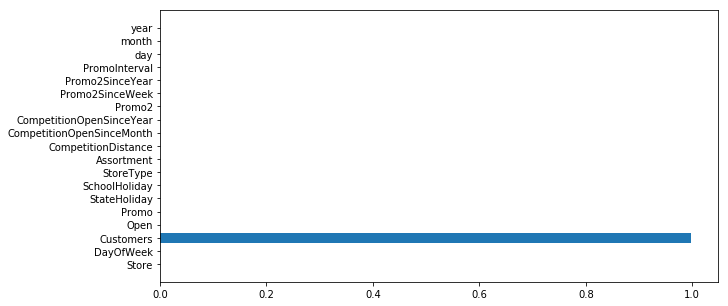

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.barh(features,model_dt.feature_importances_)
pd.Series(model_dt.feature_importances_,index=features)

In [46]:
stores_avg_cust = data.groupby(['Store'])[['Customers']].mean().reset_index().astype(int)
test_1 = test.merge(stores_avg_cust,on='Store',how='left')
test.shape,test_1.shape
test_merged = test_1.merge(store,on='Store',how='inner')
test_merged['Open']=test_merged['Open'].fillna(1)
test_merged['Date']=pd.to_datetime(test_merged["Date"],format='%Y-%m-%d')
test_merged['day']=test_merged['Date'].dt.day
test_merged['month']=test_merged['Date'].dt.month
test_merged['year']=test_merged['Date'].dt.year
test_merged['StateHoliday']=test_merged['StateHoliday'].map({'0':0,'a':1})
test_merged['StateHoliday']=test_merged['StateHoliday'].astype(int)
test_merged['Assortment']=test_merged['Assortment'].map({'a':1,'b':2,'c':3})
test_merged['Assortment']=test_merged['Assortment'].astype(int)
test_merged['StoreType']=test_merged['StoreType'].map({'a':1,'b':2,'c':3,'d':4})
test_merged['StoreType']=test_merged['StoreType'].astype(int)
map_promo = {'Jan,Apr,Jul,Oct':1,'Feb,May,Aug,Nov':2,'Mar,Jun,Sept,Dec':3}
test_merged['PromoInterval']=test_merged['PromoInterval'].map(map_promo)


In [47]:
test_merged

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Customers,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,day,month,year
0,1,1,4,2015-09-17,1.0,1,0,0,467,3,...,1270.0,9.0,2008.0,0,0.0,2011.0,1,17,9,2015
1,857,1,3,2015-09-16,1.0,1,0,0,467,3,...,1270.0,9.0,2008.0,0,0.0,2011.0,1,16,9,2015
2,1713,1,2,2015-09-15,1.0,1,0,0,467,3,...,1270.0,9.0,2008.0,0,0.0,2011.0,1,15,9,2015
3,2569,1,1,2015-09-14,1.0,1,0,0,467,3,...,1270.0,9.0,2008.0,0,0.0,2011.0,1,14,9,2015
4,3425,1,7,2015-09-13,0.0,0,0,0,467,3,...,1270.0,9.0,2008.0,0,0.0,2011.0,1,13,9,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,37664,1115,3,2015-08-05,1.0,1,0,1,358,4,...,5350.0,9.0,2013.0,1,22.0,2012.0,3,5,8,2015
41084,38520,1115,2,2015-08-04,1.0,1,0,1,358,4,...,5350.0,9.0,2013.0,1,22.0,2012.0,3,4,8,2015
41085,39376,1115,1,2015-08-03,1.0,1,0,1,358,4,...,5350.0,9.0,2013.0,1,22.0,2012.0,3,3,8,2015
41086,40232,1115,7,2015-08-02,0.0,0,0,1,358,4,...,5350.0,9.0,2013.0,1,22.0,2012.0,3,2,8,2015


In [48]:
test_pred = model_dt.predict(test_merged[features])
test_pred_inv = np.exp(test_pred) - 1

In [49]:
submission = pd.read_csv('/kaggle/input/rossmann-store-sales/sample_submission.csv')
submission_predicted = pd.DataFrame({'Id':test['Id'],'Sales':test_pred_inv})
submission_predicted.to_csv('submission.csv',index=False)
submission_predicted.head()

,Id,Sales
0,1,4451.997192
1,2,4451.997192
2,3,4451.997192
3,4,4451.997192
4,5,3933.626011
